In [1]:
%matplotlib auto
#弹出窗绘图

#%matplotlib inline
#控制台绘图


Using matplotlib backend: Qt5Agg


In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import numpy as np
import random
import string
import time

from scipy import stats
from mpl_toolkits.mplot3d import Axes3D


### 运行计算函数

导入函数

In [3]:
%%time
#%%prun

%run ./coin_rate_culculate.ipynb
%run ./picture_by_matplotlib.ipynb

Wall time: 428 ms


---

0;1;2;3;4;5;6;7;8;9;10;11;12;13;14;15;16;17;18;19;20;21;22;23;24;25;26;27;28;29;30;31;32;33;34;35;36;37;38;39;40;41;42;43;44;45;46;47;48;49;50;51;52;53;54;55;56;57;58;59;60;61;62;63;64;65;66;67;68;69;70;71;72;73;74;75;76;77;78;79;80;81;82;83;84;85;86;87;88;89;90;91;92;93;94;95;96;97;98;99;
GET IT 0.8 0.1
0;1;2;3;4;5;6;7;8;9;10;11;12;13;14;15;16;17;18;19;20;21;22;23;24;25;26;27;28;29;30;31;32;33;34;35;36;37;38;39;40;41;42;43;44;45;46;47;48;49;50;51;52;53;54;55;56;57;58;59;60;61;62;63;64;65;66;67;68;69;70;71;72;73;74;75;76;77;78;79;80;81;82;83;84;85;86;87;88;89;90;91;92;93;94;95;96;97;98;99;
GET IT 0.8 0.12
0;1;2;3;4;5;6;7;8;9;10;11;12;13;14;15;16;17;18;19;20;21;22;23;24;25;26;27;28;29;30;31;32;33;34;35;36;37;38;39;40;41;42;43;44;45;46;47;48;49;50;51;52;53;54;55;56;57;58;59;60;61;62;63;64;65;66;67;68;69;70;71;72;73;74;75;76;77;78;79;80;81;82;83;84;85;86;87;88;89;90;91;92;93;94;95;96;97;98;99;
GET IT 0.8 0.15
0;1;2;3;4;5;6;7;8;9;10;11;12;13;14;15;16;17;18;19;20;21;22;23;24;25;26;27;28;29;

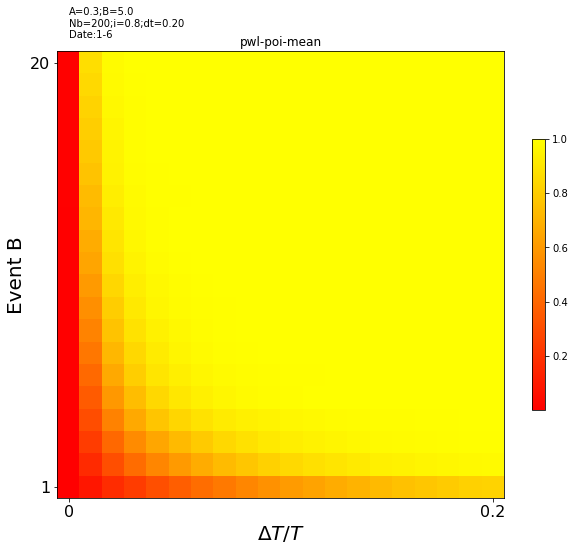

In [6]:
fig = plt.figure()
fig.set_size_inches(10,10)

size_a=100
p_a=0.3
p_b=5
inter=1
d_t=0.00
text='A=%.1f;B=%.1f\nNb=%d;i=%.1f;dt=%.2f\nDate:%s-%s'%((p_a,p_b,size_a*2,inter,d_t)+time.localtime()[1:3])
twotitle='pwl-poi-mean'

d1=[0.00,0.02,0.05,0.08,0.1]
d2=[0.1,0.12,0.15,0.18,0.2]
i1=[0.2,0.5,0.8,1]
ims = []

for i in [0.8]:
    inter=i
    
    for j in d2:
        d_t=j
        text='A=%.1f;B=%.1f\nNb=%d;i=%.1f;dt=%.2f\nDate:%s-%s'%((p_a,p_b,size_a*2,inter,d_t)+time.localtime()[1:3])

        x=[]
        for temp in range(100):
            a=transfrom_ts_to_t(stats.powerlaw.rvs(p_a,size=size_a))
            b=transfrom_ts_to_t(stats.poisson.rvs(p_b,size=size_a*2))
            x.append(dif_seq_inter2(a,b,inter=inter,d_t=d_t))
            print(temp,end=';')
        print('\nGET IT',i,j)
        im = plt.imshow(np.mean(x,axis=0),
                        animated=True,
                        interpolation='nearest',
                        cmap='autumn',
                        origin='upper')
        txt=plt.text(0,-1,text,size=10,va='bottom')
        ims.append([im,txt])

plt.xlabel(r'$\Delta T/T$',fontdict={'size': 20, 'color': 'k'})
plt.ylabel('Event B',fontdict={'size': 20, 'color': 'k'})
plt.xticks((0,19),('0','0.2'),size=16)
plt.yticks((0,19),('20','1'),size=16)
plt.title(twotitle)
fig.colorbar(im,shrink=0.5)

ani = animation.ArtistAnimation(fig, ims, 
                                blit=True,
                                repeat_delay=1000)

ani.save('inter-dt-100.gif', dpi=300, writer='imagemagick',fps=1)

#plt.show()